In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices

In [2]:
dta =sm.datasets.fair.load_pandas().data

In [3]:
dta['affair'] = (dta.affairs >0).astype(int)

In [4]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

In [5]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [16]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [6]:
y = np.ravel(y)

In [7]:
y_df=pd.DataFrame(data=y,columns=['affair'])

In [8]:
df=pd.concat([X,y_df],axis=1)

In [9]:
df.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [23]:
# Size check

df.shape

(6366, 18)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 18 columns):
Intercept        6366 non-null float64
occ_2            6366 non-null float64
occ_3            6366 non-null float64
occ_4            6366 non-null float64
occ_5            6366 non-null float64
occ_6            6366 non-null float64
occ_husb_2       6366 non-null float64
occ_husb_3       6366 non-null float64
occ_husb_4       6366 non-null float64
occ_husb_5       6366 non-null float64
occ_husb_6       6366 non-null float64
rate_marriage    6366 non-null float64
age              6366 non-null float64
yrs_married      6366 non-null float64
children         6366 non-null float64
religious        6366 non-null float64
educ             6366 non-null float64
affair           6366 non-null float64
dtypes: float64(18)
memory usage: 945.0 KB


In [25]:
## Data Preprocessing

# Step1 - Null checks

df.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
affair           0
dtype: int64

C:\ProgramData\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


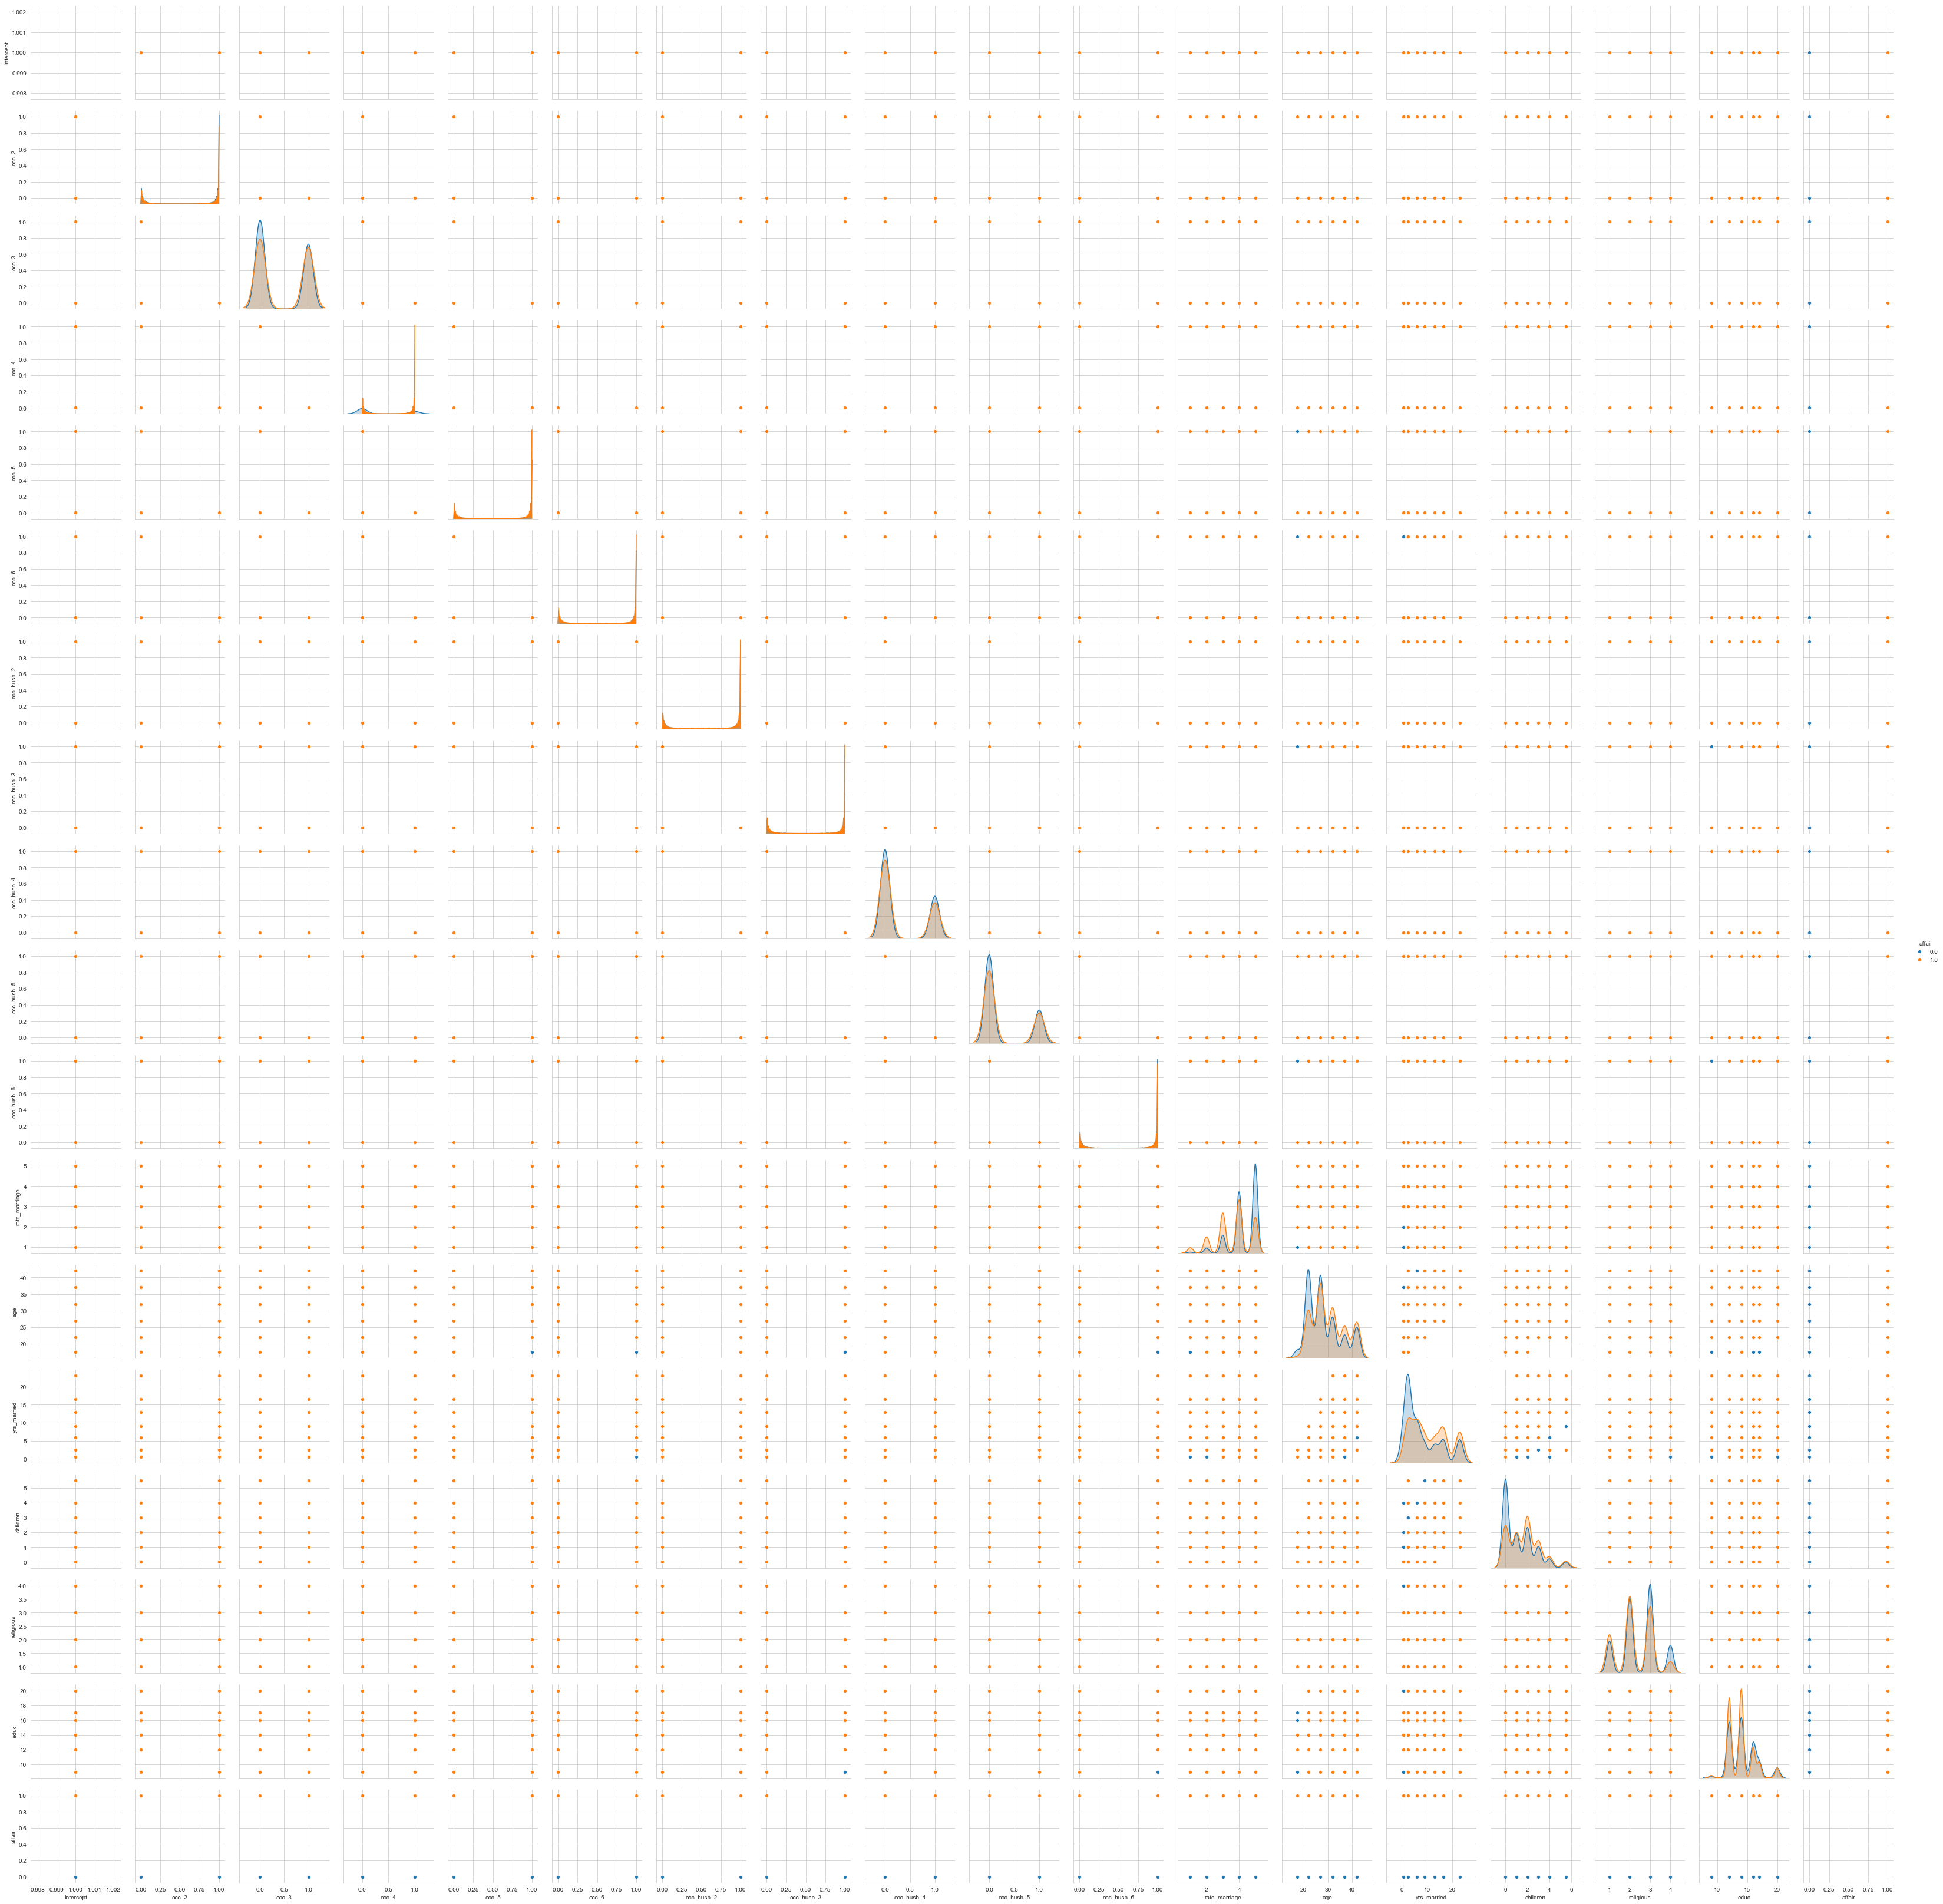

In [59]:
# Pairplot check!

sns.pairplot(df,hue='affair')

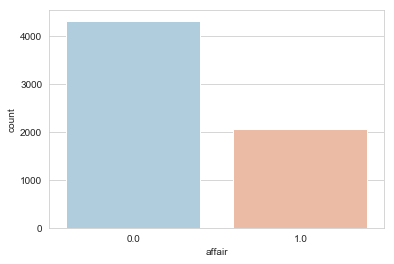

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='affair',data=df,palette='RdBu_r')

In [38]:
df.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ', 'affair'],
      dtype='object')

In [10]:
X_df=df[['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ']]
y_df=df[['affair']]


In [11]:
## Test and Train data set split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, 
                                                    y_df, test_size=0.30, 
                                                    random_state=101)

In [12]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
ypred=logmodel.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

confusion=confusion_matrix(y_test,ypred)
acc=accuracy_score(y_test,ypred)
CR=classification_report(y_test,ypred)

In [55]:
print ("Confusion Matrix \n-------------------\n", confusion)

Confusion Matrix 
-------------------
 [[1158  119]
 [ 432  201]]


In [57]:
print ("Model Accuracy \n-------------------\n", acc)

Model Accuracy 
-------------------
 0.7115183246073299


In [58]:
print ("classification_report \n-------------------\n", CR)

classification_report 
-------------------
               precision    recall  f1-score   support

         0.0       0.73      0.91      0.81      1277
         1.0       0.63      0.32      0.42       633

   micro avg       0.71      0.71      0.71      1910
   macro avg       0.68      0.61      0.61      1910
weighted avg       0.70      0.71      0.68      1910



In [60]:
## Cross Validation comparison

from sklearn.model_selection import cross_val_score
score=cross_val_score(logmodel,X_test,y_test,cv=10)

C:\ProgramData\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\linear_model

In [64]:
print("Cross validation score \n----------------------\n ",score.mean())

Cross validation score 
----------------------
  0.7125687746854046


array([2432,  603,  659, ..., 4767, 4512,  292], dtype=int64)

In [15]:
y_pred=pd.DataFrame(data=ypred,columns=['Predicted'])
id = pd.DataFrame(X_test.index.values,columns=['ID1'])
output=pd.concat([id,y_pred],axis=1)
output.to_csv('LogisticRegression_Session18.csv',index=False)